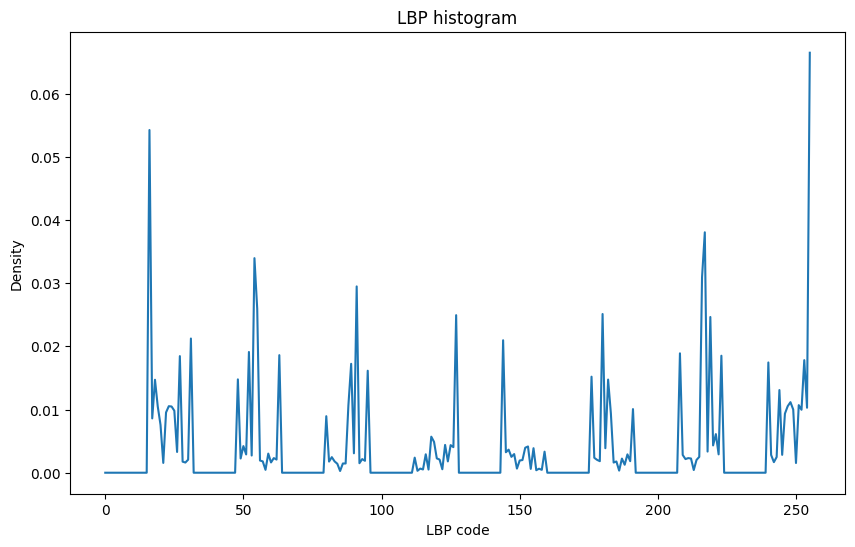

error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the radius of the circular neighborhood
R = 1

def lbp(image, P=8, R=1):
    # Convert the input image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the LBP codes
    lbp_codes = np.zeros((gray.shape[0] - 2*R, gray.shape[1] - 2*R), dtype=np.int32)
    for i in range(R, gray.shape[0] - R):
        for j in range(R, gray.shape[1] - R):
            neighbours = gray[i-R:i+R+1, j-R:j+R+1]
            center = neighbours[R, R]
            thresh = np.mean(neighbours)
            binary = (neighbours >= center).astype(int)
            decimal = np.uint8(np.dot(binary.ravel(), [2**i for i in range(9)]))
            lbp_codes[i-R, j-R] = decimal
    return lbp_codes

def lbp_histogram(lbp_codes, bins=np.arange(0, 257)):
    hist, _ = np.histogram(lbp_codes, bins=bins, density=True)
    return hist

def lbp_visualization(image, lbp_codes):
    # Convert the input image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the LBP codes
    lbp_img = np.zeros(gray.shape, dtype=np.uint8)
    for i in range(R, gray.shape[0] - R):
        for j in range(R, gray.shape[1] - R):
            neighbours = gray[i-R:i+R+1, j-R:j+R+1]
            center = neighbours[R, R]
            thresh = np.mean(neighbours)
            binary = (neighbours >= center).astype(int)
            decimal = np.uint8(np.dot(binary.ravel(), [2**i for i in range(9)]))
            lbp_img[i, j] = decimal
    return lbp_img

# Load the input image
image = cv2.imread('image.png')

# Check if the image was loaded
if image is None:
    print('Error: could not open or find the input image.')
    exit()

# Compute the LBP codes
lbp_codes = lbp(image)

# Compute the LBP histogram
lbp_hist = lbp_histogram(lbp_codes)

# Plot the LBP histogram
plt.figure(figsize=(10, 6))
plt.plot(lbp_hist)
plt.title('LBP histogram')
plt.xlabel('LBP code')
plt.ylabel('Density')
plt.show()

# Visualize the LBP codes
lbp_img = lbp_visualization(image, lbp_codes)

# Display the LBP visualization
cv2.imshow('LBP Visualization', lbp_img)
cv2.waitKey(0)
cv2.destroyAllWindows()